# Проект: Исследование продаж игр за 2016 год

<b>Цели проекта</b> 
    <p>Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.</p>
<div/>

<div><b>Задачи проекта</b> 
    <p>Выяснить, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?</p>  
    <p>Посмотрить, как менялись продажи по платформам. Выберать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?</p>  
    <p>Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.</p>  
    <p>Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.</p> 
    <p>Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?</p>     
<div/>
    
<b>Составить портрет пользователя каждого региона</b> 
<p>Определить для пользователя каждого региона (NA, EU, JP):</p>
    
    1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    2. Самые популярные жанры (топ-5). Поясните разницу.
    3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<b>Проверить гипотезы</b> 
<p>Определите для пользователя каждого региона (NA, EU, JP):</p>
    
    1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<b>Написать общий вывод</b>    

## Изучение общей информаци

### Импорт библиотек и открытие файла с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from scipy import stats as st
from matplotlib.colors import ListedColormap



<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>

Здорово, что все импорты собраны в самом начале, так сразу понятно, какие у проекта зависимости 👍</div>    


In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# pd.set_option('display.float_format', '{:.2f}'.format)

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>

Форматирование через `%` можно назвать устаревшим, лучше форматировать через `f` строки или `.foramt`: https://pyformat.info/
    
Т.е. например так: `pd.set_option('display.float_format', '{:.2f}'.format)`
</div>    


In [3]:
# загрузка файла с локального диска
path = r'D:\Работа\Аналитик данных\Проекты\Продажа игр\games.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<a id="preprocessing"></a>
## Подготовка данных

### Замена названия столбцов (приведение к нижнему регистру)

In [6]:
# Приведение к нижнему регистру
df.columns = df.columns.str.lower()

In [7]:
# Проверка на явные дубликаты
df.duplicated().sum()

0

In [8]:
# Проверка на не явные дубликаты
df.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

2

In [9]:
# Удаление одного дубликата.
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

### Приведение данных к нужному типу

In [10]:
# здесь сразу удаляю пропуски, так как их мало и мне они будут мешать чтобы приводить данные в этом слобце в нужный мне вид.
# Заполнить их также нельзя, нет подходящего, адекватного варианта. 
df = df.dropna(subset=['year_of_release'])
df['year_of_release'].value_counts(dropna=False)

2008.00    1427
2009.00    1426
2010.00    1255
2007.00    1197
2011.00    1136
2006.00    1006
2005.00     939
2002.00     829
2003.00     775
2004.00     762
2012.00     652
2015.00     606
2014.00     581
2013.00     544
2016.00     502
2001.00     482
1998.00     379
2000.00     350
1999.00     338
1997.00     289
1996.00     263
1995.00     219
1994.00     121
1993.00      61
1981.00      46
1992.00      43
1991.00      41
1982.00      36
1986.00      21
1989.00      17
1983.00      17
1990.00      16
1987.00      16
1988.00      15
1985.00      14
1984.00      14
1980.00       9
Name: year_of_release, dtype: int64

In [11]:
# Привожу солбец с датой релиза игры к типу data, но в процессе вижу, что удобнее будет работать только с годом в формате int
df['year_of_release'] = pd.to_datetime(df['year_of_release'],format='%Y')
df['year_of_release'] = df['year_of_release'].dt.year
df['year_of_release'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64

Вижу, что в столбце с оценками пользователей встретилось то самое tbd. Загуглил, означает To Be Determined. То есть, если речь об оценке, то пользователь ещё не оценил игру, а только в процессе. Это значит, что данное значение можно удалять.
В этом слобце меняем тип данных со строки на float, устанавливаем такой жи тип, как в столбце с оценкой критиков. Думаю, логично если оценки это числа, особенно не целые, то лучше записать их в формате float. Можно будет выполнять вычислительные операции. 

In [12]:
df['user_score'].unique() 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['user_score'].unique() 

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

### Обработка пропусков

In [14]:
df.isnull().sum(axis=0).sort_values(ascending=False)

user_score         8982
critic_score       8462
rating             6677
name                  1
genre                 1
platform              0
year_of_release       0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [15]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(17,5), legend = False, fontsize = 16)
            .set_title('Пропуски в процентах' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :)')

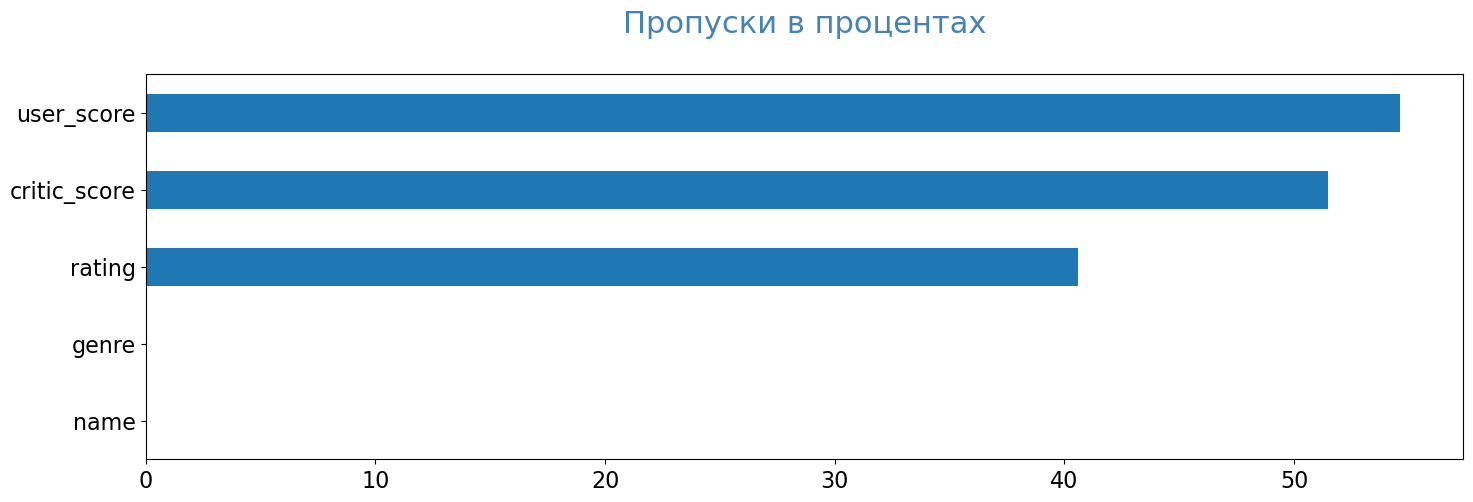

In [16]:
pass_value_barh(df)

Видим, что больше всего пропусков в столбцах с оценками пользователей и критиков и с столбце с рейтингом.
Для оценок, можно предположить что просто не все игры получили оценки, это человесеский фактор, либо некоторые игры просто не были в списке тех, которые физически могли оценить. я бы не стал заполнять пропуски, так как адекватных значений, которые бы не испортили данные не вижу. удалять их тоже не стоит, это большой кусок df. С рейтингом, вероятно, та же ситуация, он не был проставлен. подумаю, возможно если понадобиться простоавлю всем "E". здесь есть логика в том, что если рейтинг не стоит возможно игра подходит всем. 

In [17]:
#Удаляю пропуски в столбце name. их мало и данные эти не нужны.
df = df.dropna(subset=['name'])

In [18]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [19]:
df['year_of_release'].sort_values().unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016], dtype=int64)

### Подсчёт суммарных продаж во всех регионах

In [20]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Провединие исследовательского анализа данных

### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Начиная с 1992-1993гг наблюдался существенное изменение количества выпускаемых игр, до этого времени можно сказать, что индустрия была в своей колыбели и нам мало что могут рассказть те данные. Но так как мы хотим делать какие-то прогнозы на 2017 год, то отрезать будем больше, домаю стоит брать где-то 2014, многие платформы уже не ушли с рынка и это нам поможет более точно прогнозировать что либо.

In [21]:
df.groupby('year_of_release')['name'].count().to_frame()

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


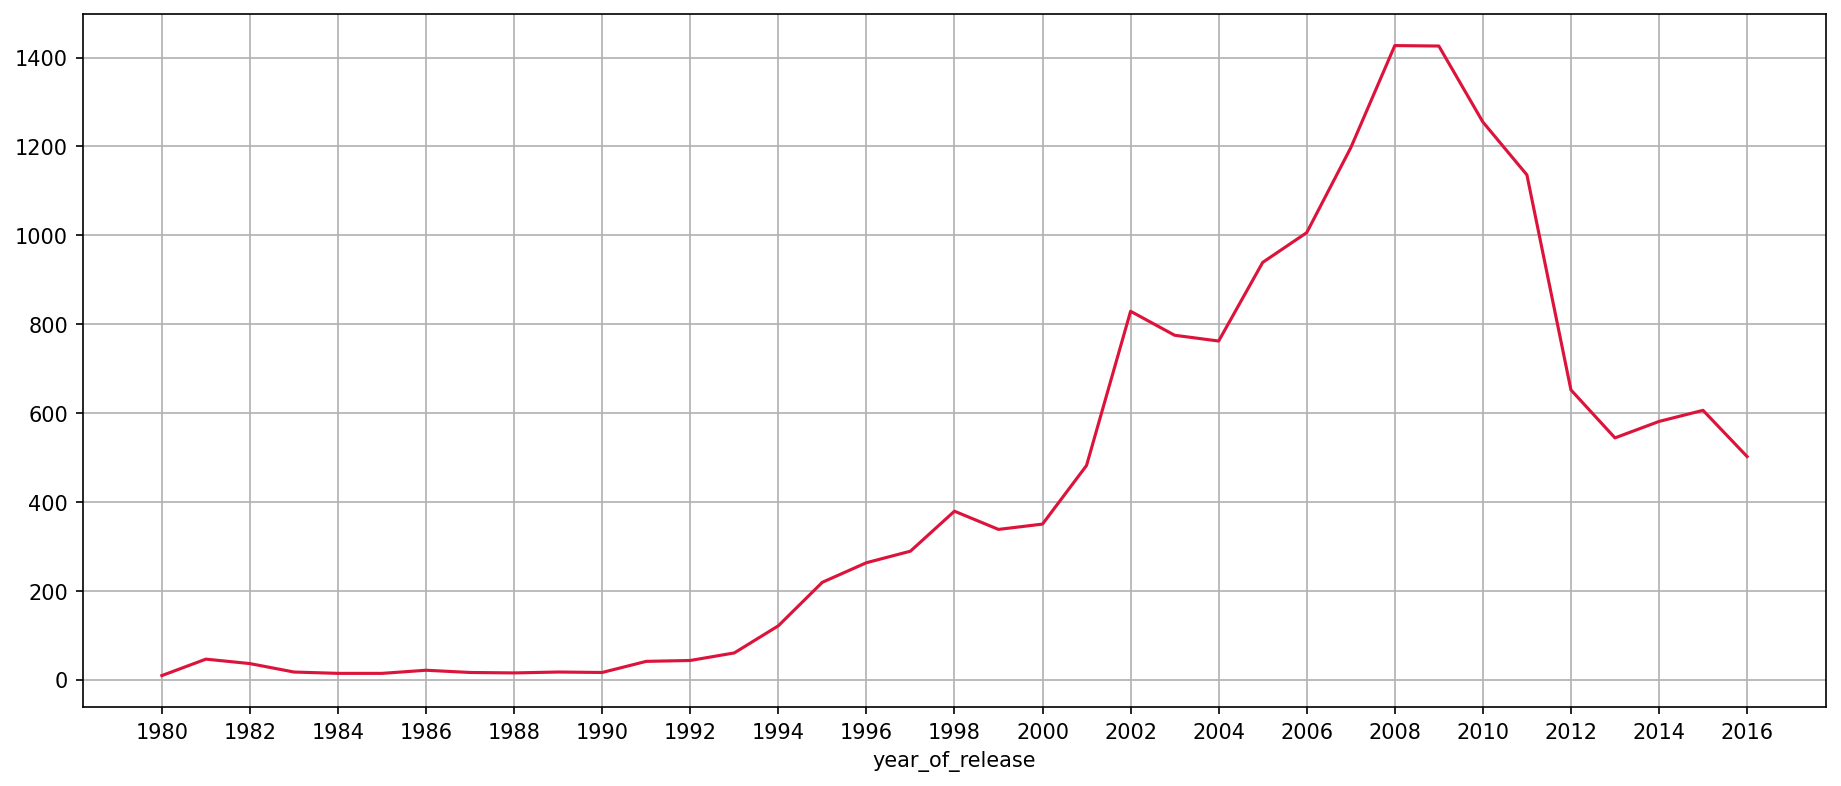

In [22]:

import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15,6), dpi=150)

df.groupby('year_of_release')['name'].count().plot(grid=True, ax=ax, color='crimson');
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

### Как менялись продажи по платформам?

In [23]:
df_two = df.loc[df['year_of_release'] >= 1995].reset_index(drop=True)

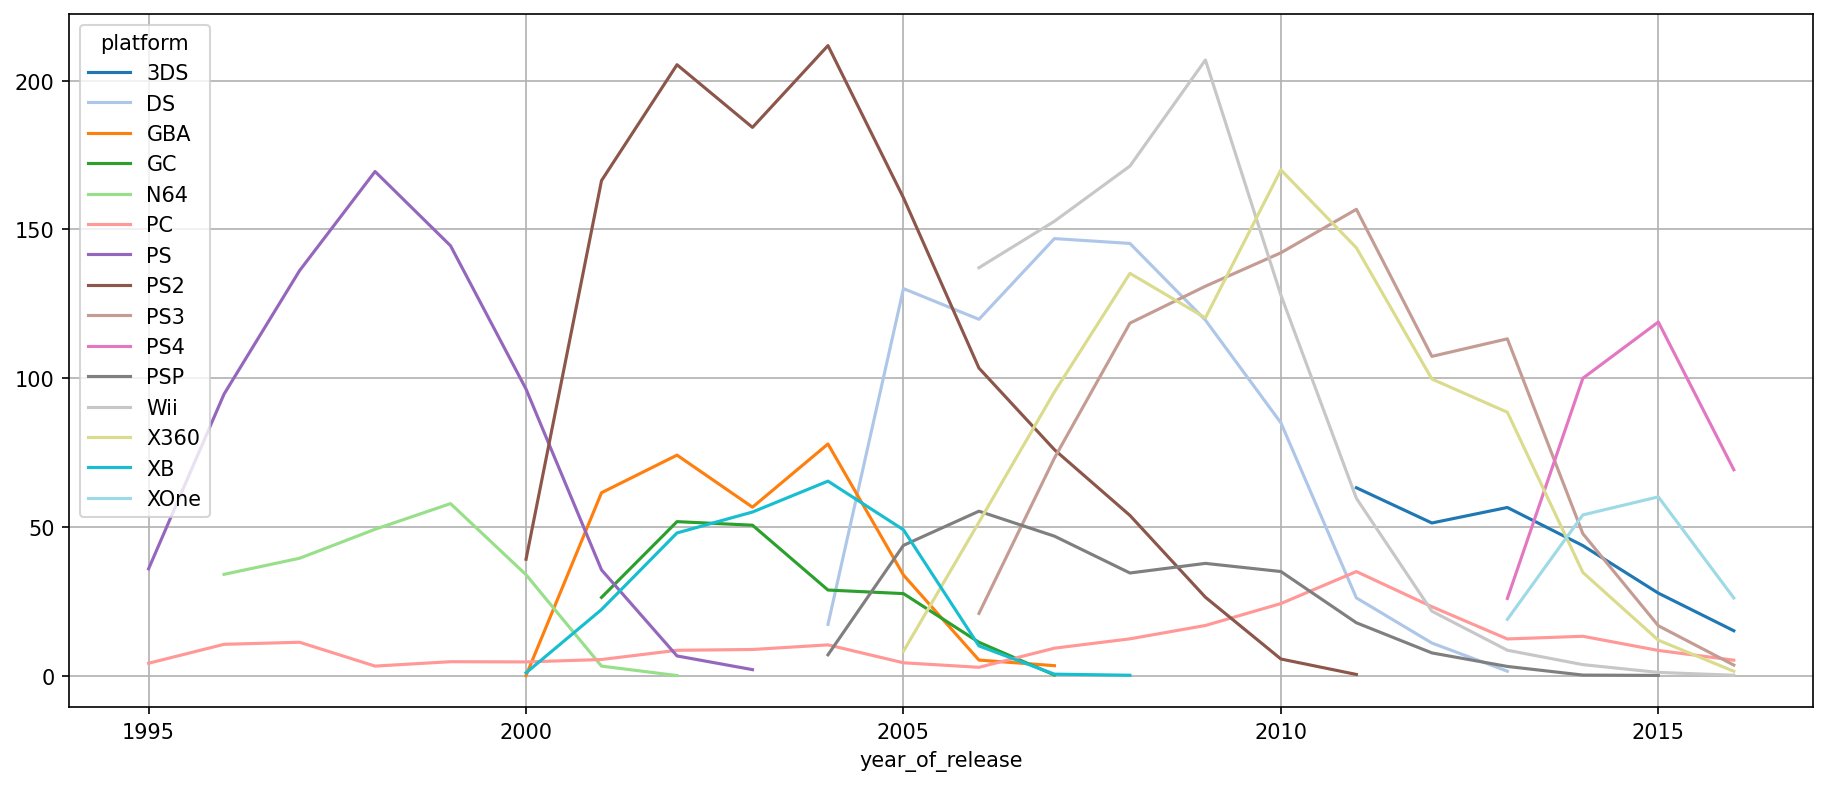

In [24]:


top_platforms = df_two.groupby('platform').agg({'total_sales' : 'sum'}).sort_values(by='total_sales', ascending=False).head(15).index

fig, ax = plt.subplots(figsize=(15,6), dpi=150)

df_two[df_two['platform'].isin(top_platforms)].pivot_table(index='year_of_release', columns='platform', 
                   values='total_sales', aggfunc='sum').plot(grid=True, ax=ax, cmap='tab20'); 

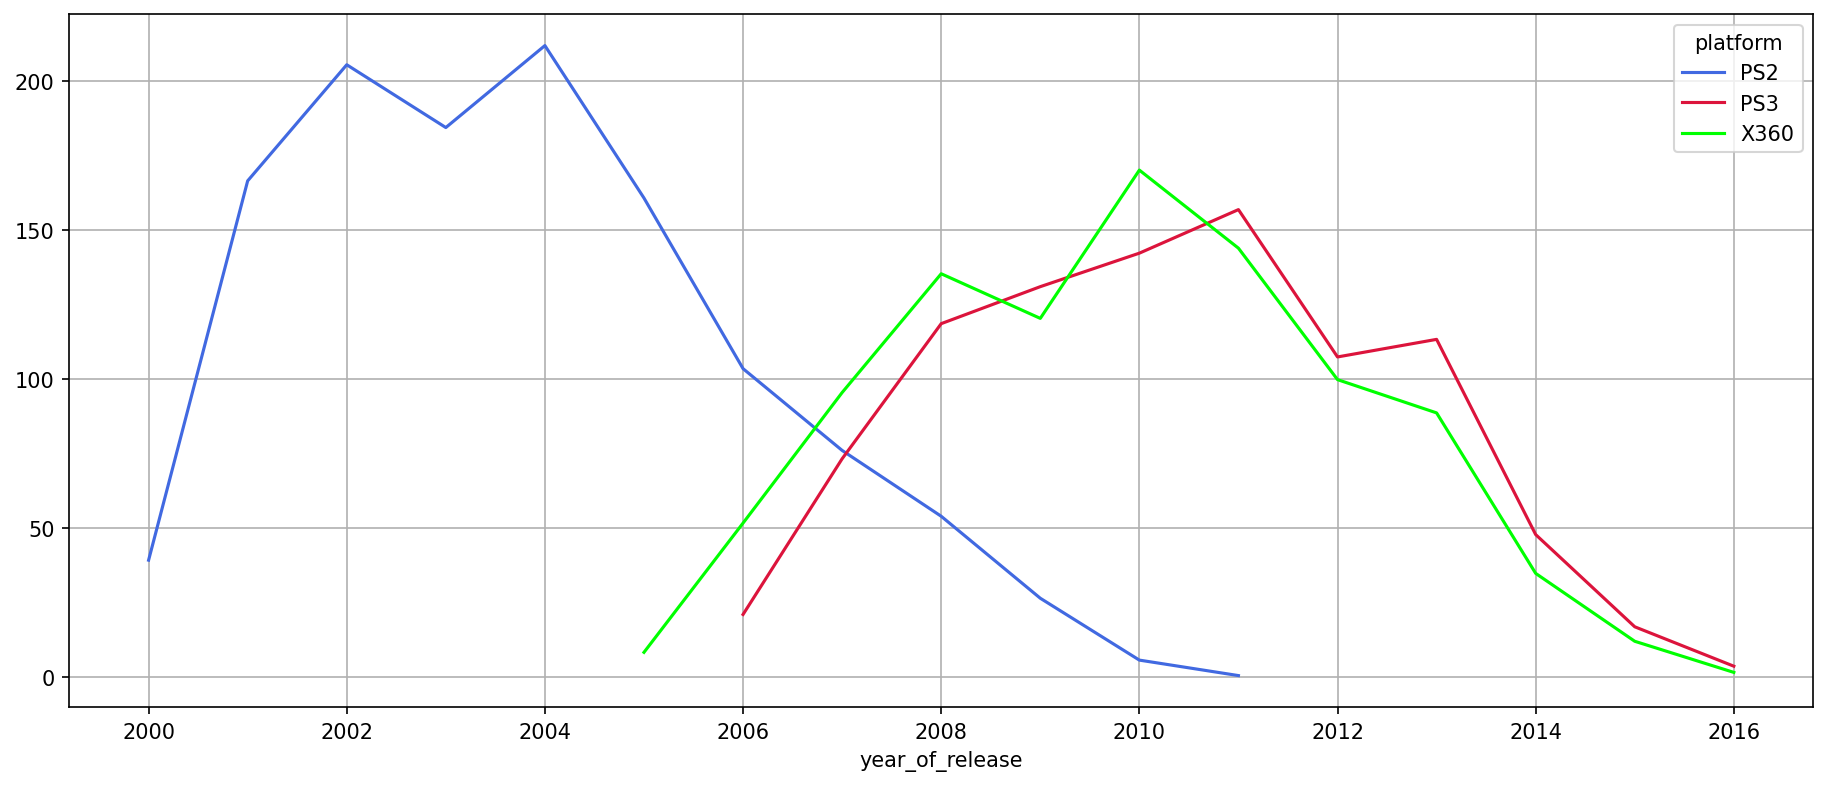

In [25]:


top_platforms = df_two.groupby('platform').agg({'total_sales' : 'sum'})\
    .sort_values(by='total_sales', ascending=False)\
    .head(3).index

fig, ax = plt.subplots(figsize=(15,6), dpi=150)

colors = ListedColormap(['royalblue','crimson','lime']) 

df_two[df_two['platform'].isin(top_platforms)].pivot_table(index='year_of_release', columns='platform', 
                   values='total_sales', aggfunc='sum').plot(grid=True, ax=ax, cmap=colors); 

По графику видно, что платформы популярны в среднем 5-6 лет. далее будем отрезать года и приближаться к более актуальным данным

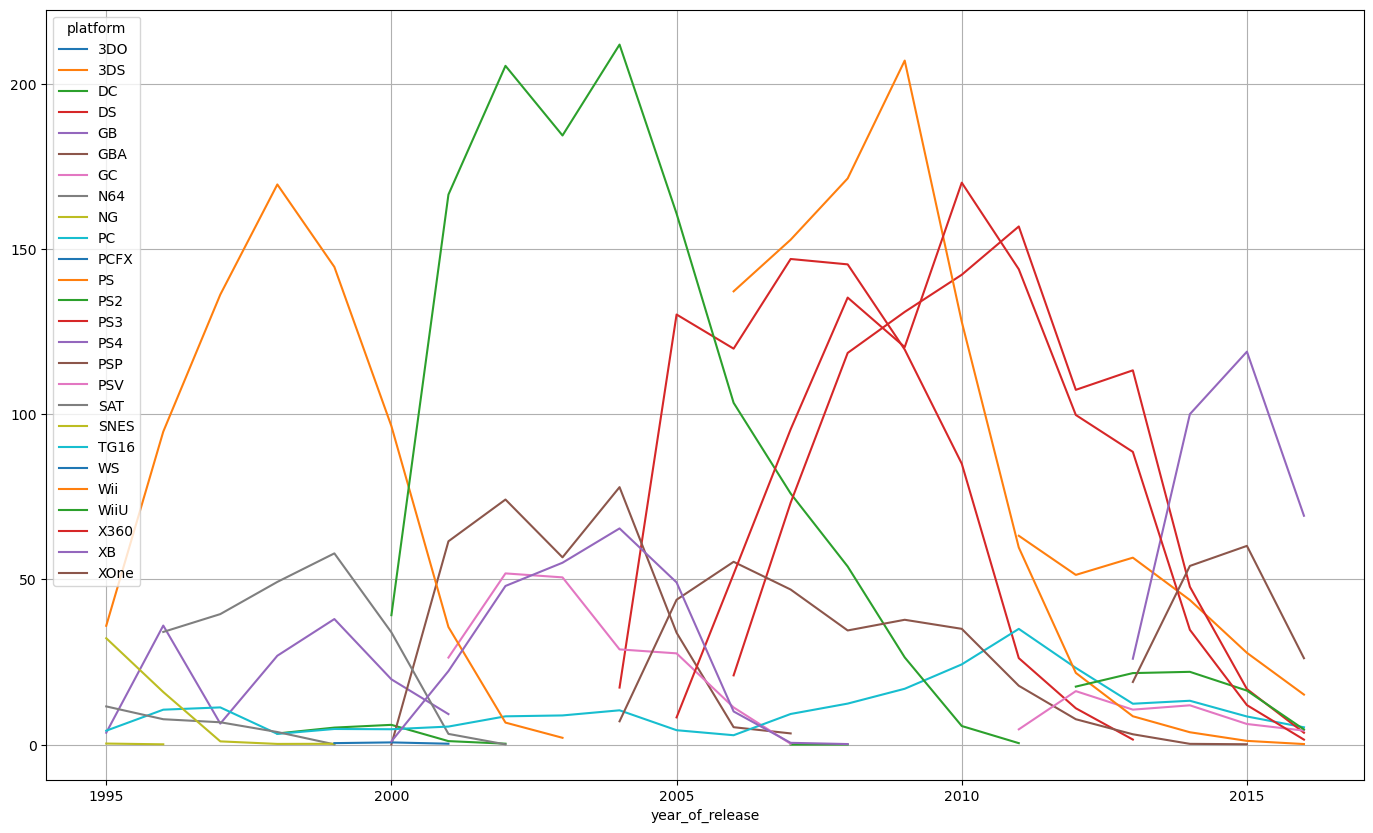

In [26]:
df_two.pivot_table(index='year_of_release', columns='platform', 
                   values='total_sales', aggfunc='sum').plot(grid=True, figsize=(17,10));

### Какие платформы лидируют по продажам, растут или падают?

In [27]:
df_clean = df_two.loc[df_two['year_of_release'] >= 2014].reset_index(drop=True)

In [28]:
platform_sales = df_clean.groupby(['platform'])['total_sales'].agg('sum')
platform_sales.sort_values(ascending=False)

platform
PS4    288.15
XOne   140.36
3DS     86.68
PS3     68.18
X360    48.22
WiiU    42.98
PC      27.05
PSV     22.40
Wii      5.07
PSP      0.36
Name: total_sales, dtype: float64

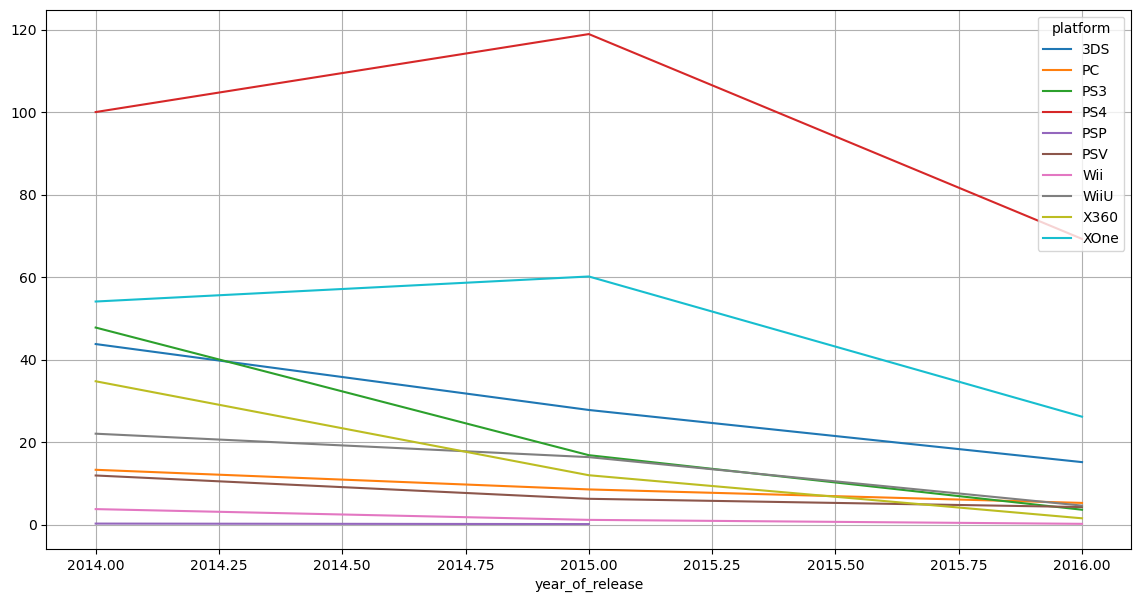

In [29]:

df_clean.pivot_table(index='year_of_release', columns='platform', 
                     values='total_sales', aggfunc='sum').plot(grid=True, figsize=(14,7));

Видим, что по продажам с 2010 года лидируют 3 платформы -  PS3, X360 и PS4. популярность всех платформ падает. несколько выделяется PS4, но предположительно из-за того, что это относительно новая платформа и получила свою долю раскрутки начиная с 2013 года и поэтому имела вместе с XOne свой рост популярность, как новичков на фоне общего спада. После 2015 года, когда был пик продаж по ps4 и XOne они стали стали сбавлять, что не удивительно опираясь на то, что мы видим общий спад и на то, что популярность платформ держится примерно эти сроки. 2-3 года, потом продажи падают. 

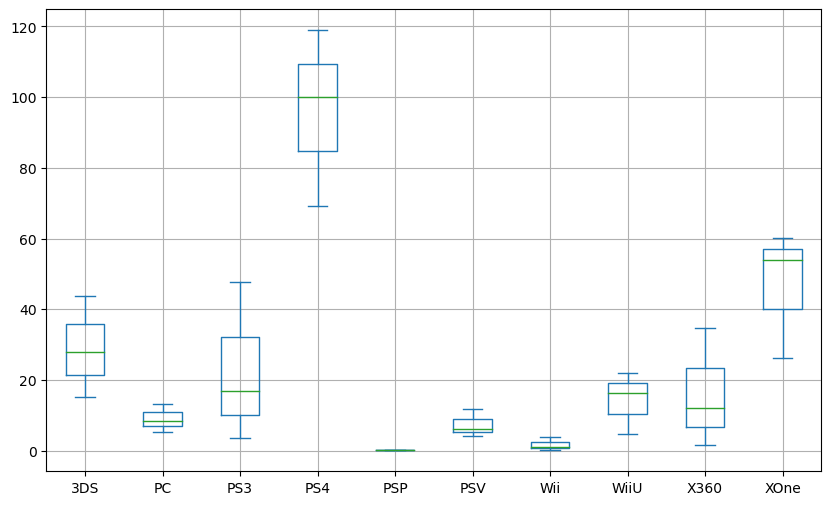

In [30]:
df_clean.pivot_table(index='year_of_release', columns='platform', 
                     values='total_sales', aggfunc='sum').plot(kind='box', grid=True, figsize=(10,6));

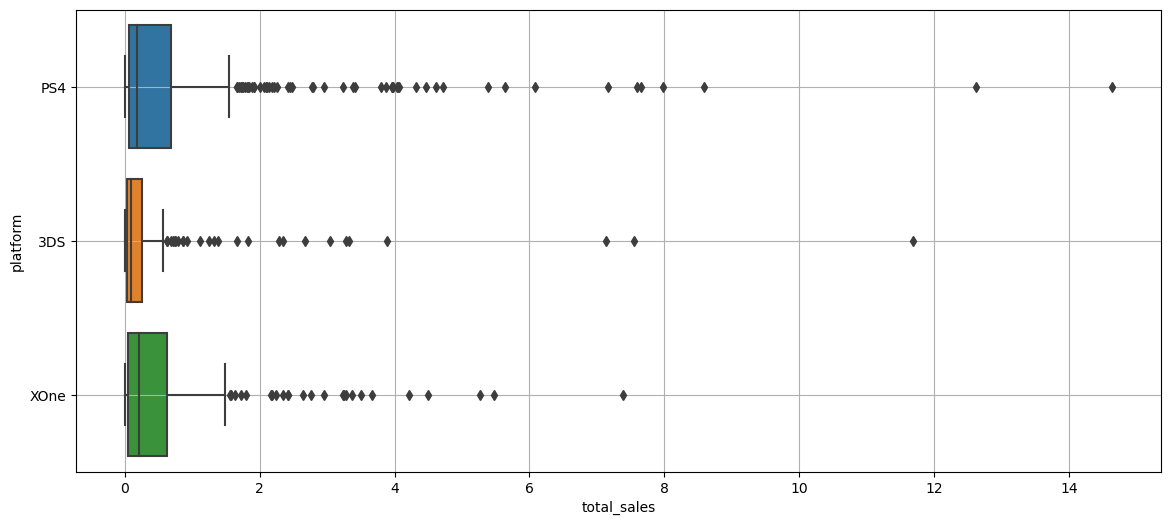

In [31]:
top_three = df_clean.query('(platform == "PS4" or platform == "XOne" or platform == "3DS")')
plt.rcParams['figure.figsize']=(14,6)
sns.boxplot(x=top_three['total_sales'], y=top_three['platform'], orient='h')
plt.grid()
plt.show()

In [32]:

top_games_ps4 = df_clean.query('platform == "PS4"')
top_games_ps4.pivot_table(index = 'name', values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending=False)

,total_sales
name,
Call of Duty: Black Ops 3,14.63
Grand Theft Auto V,12.62
FIFA 16,8.58
Star Wars Battlefront (2015),7.98
Call of Duty: Advanced Warfare,7.66
...,...
Rocksmith 2014 Edition Remastered,0.01
Root Letter,0.01
Crows: Burning Edge,0.01


In [33]:

top_games_xone = df_clean.query('platform == "XOne"')
top_games_xone.pivot_table(index = 'name', values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending=False)

,total_sales
name,
Call of Duty: Black Ops 3,7.39
Grand Theft Auto V,5.47
Call of Duty: Advanced Warfare,5.26
Halo 5: Guardians,4.49
Fallout 4,4.22
...,...
Goat Simulator,0.01
Dead Rising 2,0.01
Dead Rising,0.01


In [34]:

top_games_ps4 = df_clean.query('platform == "PS4"')
top_games_ps4.pivot_table(index = 'name', values = 'total_sales', 
                          aggfunc = 'sum').sort_values('total_sales', ascending=False)

,total_sales
name,
Call of Duty: Black Ops 3,14.63
Grand Theft Auto V,12.62
FIFA 16,8.58
Star Wars Battlefront (2015),7.98
Call of Duty: Advanced Warfare,7.66
...,...
Rocksmith 2014 Edition Remastered,0.01
Root Letter,0.01
Crows: Burning Edge,0.01


In [35]:
top_games_3ds = df_clean.query('platform == "3DS"')
top_games_3ds.pivot_table(index = 'name', values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending=False)

,total_sales
name,
Pokemon Omega Ruby/Pokemon Alpha Sapphire,11.68
Super Smash Bros. for Wii U and 3DS,7.55
Pokemon Sun/Moon,7.14
Monster Hunter 4 Ultimate,3.89
Monster Hunter X,3.32
...,...
Cartoon Network Battle Crashers,0.01
Touch Detective 3: Does Funghi Dream of Bananas?,0.01
"Horse Life 4: My Horse, My Friend, My Champion",0.01


In [36]:
top_for_piechart = top_games_3ds.pivot_table(index = 'name', values = 'total_sales', \
                                             aggfunc = 'sum').sort_values('total_sales', ascending=False)
top_for_piechart = top_for_piechart.reset_index()

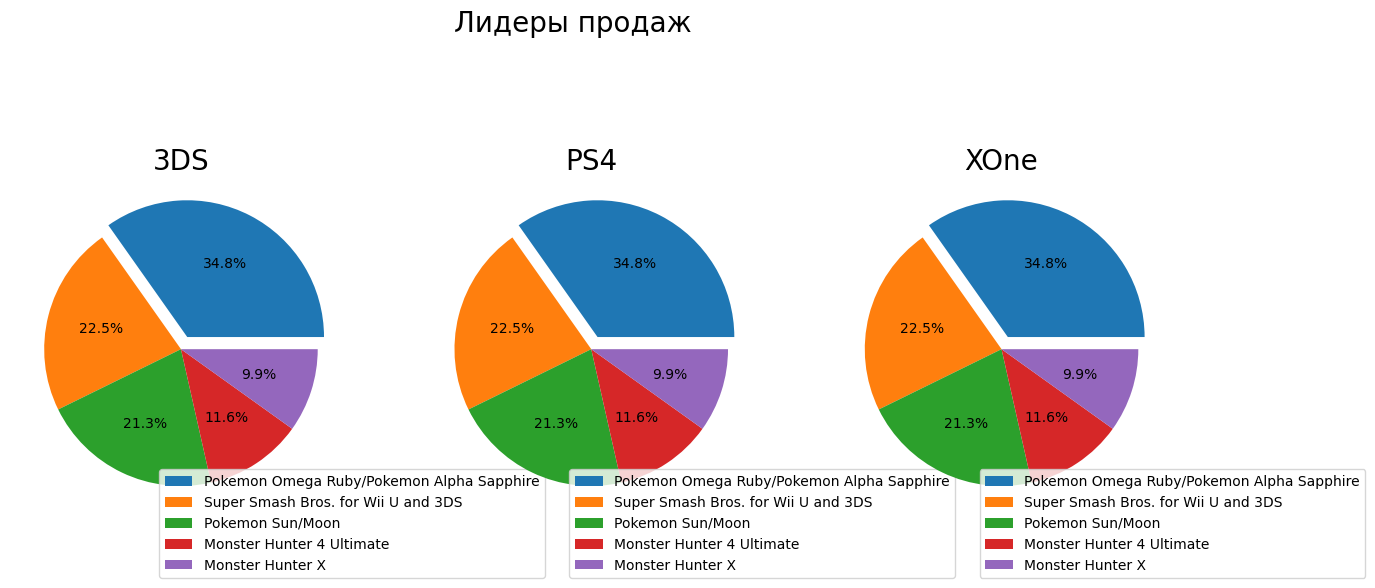

In [37]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Лидеры продаж', fontsize=20)

# Первый подграфик
ax1 = fig.add_subplot(1, 3, 1)
top_for_piechart.head(5).plot(ax=ax1, kind='pie', y='total_sales', labels=top_for_piechart['name'].head(5),
                             autopct='%1.1f%%', explode=(0.1, 0, 0, 0, 0), labeldistance=None)
ax1.set_title('3DS', fontsize=20)
ax1.legend(loc='center', bbox_to_anchor=(1.0, -0.01))
ax1.set_ylabel('')

# Второй подграфик
ax2 = fig.add_subplot(1, 3, 2)
top_for_piechart.head(5).plot(ax=ax2, kind='pie', y='total_sales', labels=top_for_piechart['name'].head(5),
                             autopct='%1.1f%%', explode=(0.1, 0, 0, 0, 0), labeldistance=None)
ax2.set_title('PS4', fontsize=20)
ax2.legend(loc='center', bbox_to_anchor=(1.0, -0.01))
ax2.set_ylabel('')

# Третий подграфик
ax3 = fig.add_subplot(1, 3, 3)
top_for_piechart.head(5).plot(ax=ax3, kind='pie', y='total_sales', labels=top_for_piechart['name'].head(5),
                             autopct='%1.1f%%', explode=(0.1, 0, 0, 0, 0), legend=True, labeldistance=None)
ax3.set_title('XOne', fontsize=20)
ax3.legend(loc='center', bbox_to_anchor=(1.0, -0.01))
ax3.set_ylabel('')

plt.show()


### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?

In [38]:
df_clean.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


In [39]:
PS3 = df_clean.loc[df_clean['platform'] == 'PS3']
PS4 = df_clean.loc[df_clean['platform'] == 'PS4']
X360 = df_clean.loc[df_clean['platform'] == 'X360']


На основе графиков и значения корреляции, можно сделать следующие наблюдения:
1. Линейная свзь чуть ниже срденего, наблюдается между оценками критиков и продажами
2. Оценки пользователей не имеют линейной связи с продажами.
3. Видно, что те игры, которые хорошо продаются (их меньшинство) действительно получают хорошие оценки от критиков 70+
4. С оценками пользователей всё более сумбурно. Можно заметить , что игра может хорошо продаваться, но иметь оценку ниже среднего. 
5. По платформам данные схожи. Немного выделяется PS4, там меьнше данных, но в целом выводы теже.
6. Можно наблюдать в некоторых случах, что оценки пользователей сильно разнятся с оценками критиков. это наблюдается в тех выбрасах (самых популярных играх) Это не всегда так, но заметить это можно. 

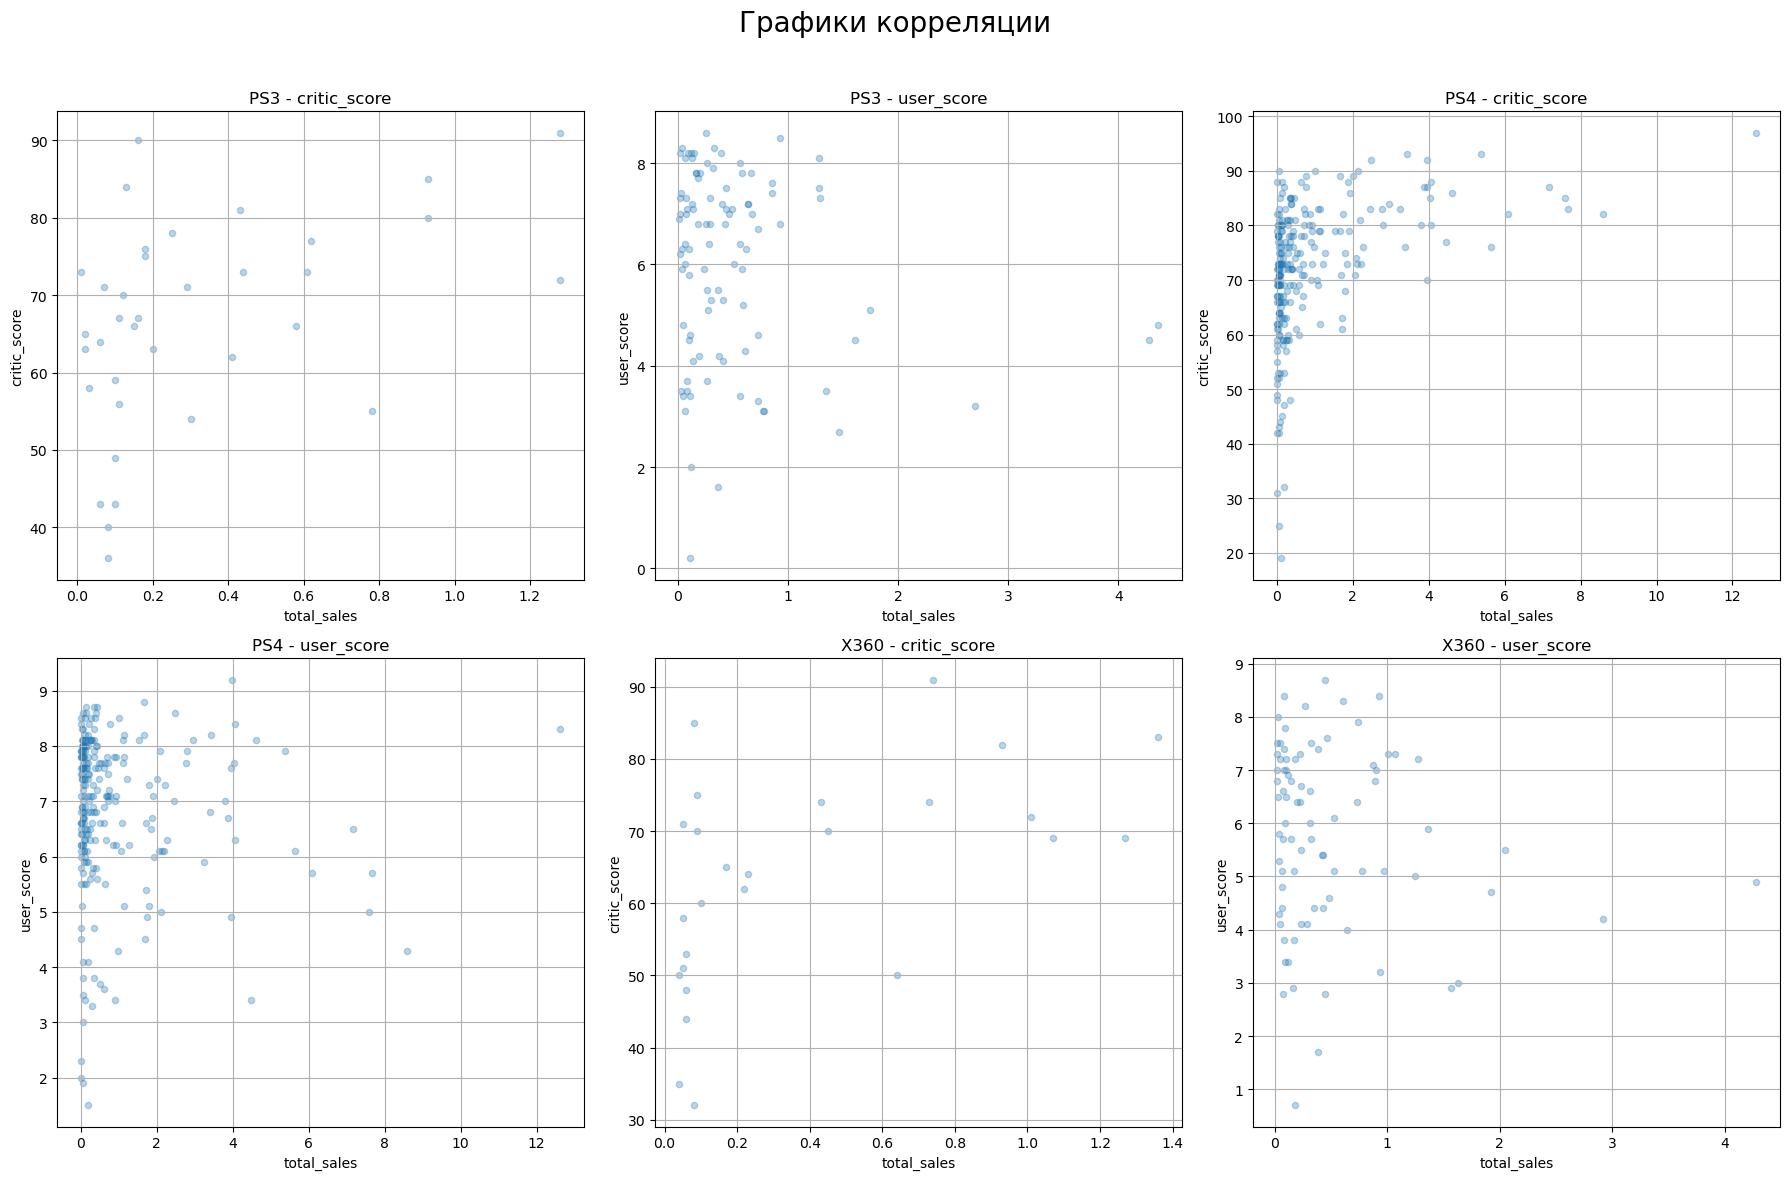

In [40]:

# Создаем сетку графиков
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Графики корреляции', fontsize=20)

# График PS3 - critic_score
PS3.plot(x='total_sales', y='critic_score', kind='scatter', grid=True, alpha=0.3, ax=axes[0, 0])
axes[0, 0].set_title('PS3 - critic_score')

# График PS3 - user_score
PS3.plot(x='total_sales', y='user_score', kind='scatter', grid=True, alpha=0.3, ax=axes[0, 1])
axes[0, 1].set_title('PS3 - user_score')

# График PS4 - critic_score
PS4.plot(x='total_sales', y='critic_score', kind='scatter', grid=True, alpha=0.3, ax=axes[0, 2])
axes[0, 2].set_title('PS4 - critic_score')

# График PS4 - user_score
PS4.plot(x='total_sales', y='user_score', kind='scatter', grid=True, alpha=0.3, ax=axes[1, 0])
axes[1, 0].set_title('PS4 - user_score')

# График X360 - critic_score
X360.plot(x='total_sales', y='critic_score', kind='scatter', grid=True, alpha=0.3, ax=axes[1, 1])
axes[1, 1].set_title('X360 - critic_score')

# График X360 - user_score
X360.plot(x='total_sales', y='user_score', kind='scatter', grid=True, alpha=0.3, ax=axes[1, 2])
axes[1, 2].set_title('X360 - user_score')

# Выравниваем заголовки
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


### Общее распределение игр по жанрам

In [41]:
df_clean['genre'].unique()

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

In [42]:
df_group = df_clean.groupby('genre')['name'].count().to_frame().reset_index().sort_values(by='name', ascending=False)

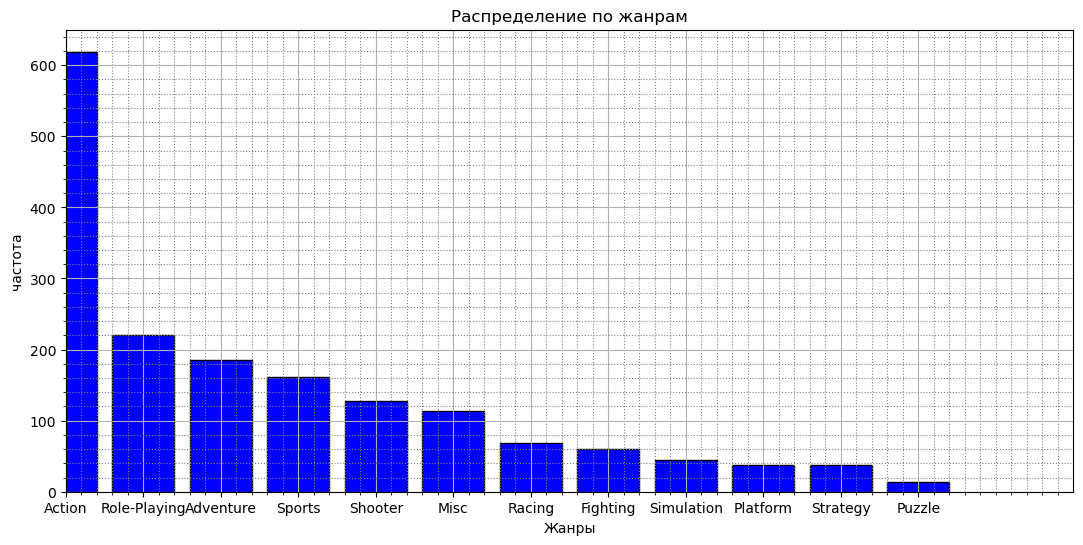

In [43]:
plt.figure(figsize=(13,6))
plt.bar(df_group['genre'], height = df_group['name'], facecolor='blue', edgecolor='black')
plt.xlabel('Жанры')
plt.ylabel('частота')
plt.title('Распределение по жанрам')
plt.grid()
plt.minorticks_on()
plt.grid(which='minor',
        color = 'gray',
        linestyle = ':')
plt.axis([0, 13, 0, 650])
plt.show()

Лидеры по продажам - игры в жанре экшн и шутеры. Пазлы являются самыми не популярными. 
При этом к не популярным жанрам можно отнести сразу несколько, мы видим это на графике, разница между ними не такая большая. А вот там где продающиеся жанры, есть большие перепады. Два топовых жанра я уже выделил и существенный спад популярности наблюдается начиная с жанра racing, далее можно говорить, что жанры не сильно прибыльны.

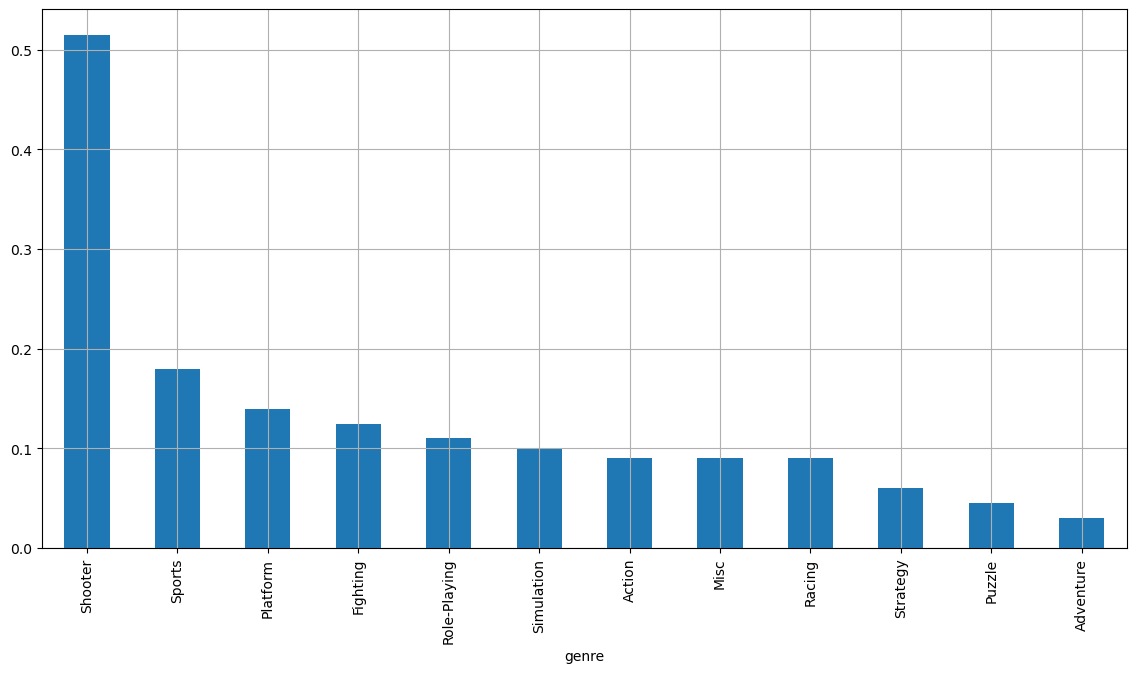

In [44]:
df_clean.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(14,7));

## Составление портрета пользователя каждого региона (NA, EU, JP)

### Самые популярные платформы (топ-5). Различия в долях продаж.

Видно, что в разных регионах лидируют разные платформы. 
1. PS3 лидирует в Евпропе, занимая 25% рынка, а также уверенно держится в лидерах и в других регионах, держа долю не менее 19%.
2. X360 крайне популярен в Северной Америке (30%), уверенно держится в Европе, при этом совсем не популярен в Японии, что подозретельно. Япония, конечно отличается от всего мира, но чтобы на столько разнились предпочтения, странно. А вот и ответ https://3dnews.ru/613405
3. Обратная ситуация Wii. Популярна в Японии, но не столь в других регионах. Можем сказать, что есть склонность играть на платформах родного/местного производства. 
4. Если и выделять усключение, что сама платформа PS вместе с её грейдами уверенно держит рынок везде. Далее можно посмотреть графики и доли продаж по регионам. 
5. Ещё одна особенность. Японцы не играют в комп(PC), а у Евпропейцев 8.18% рынка (топ4)

In [45]:
platform_na = df_clean.groupby(['platform'])['na_sales'].agg('sum')
platform_eu = df_clean.groupby(['platform'])['eu_sales'].agg('sum')
platform_jp = df_clean.groupby(['platform'])['jp_sales'].agg('sum')

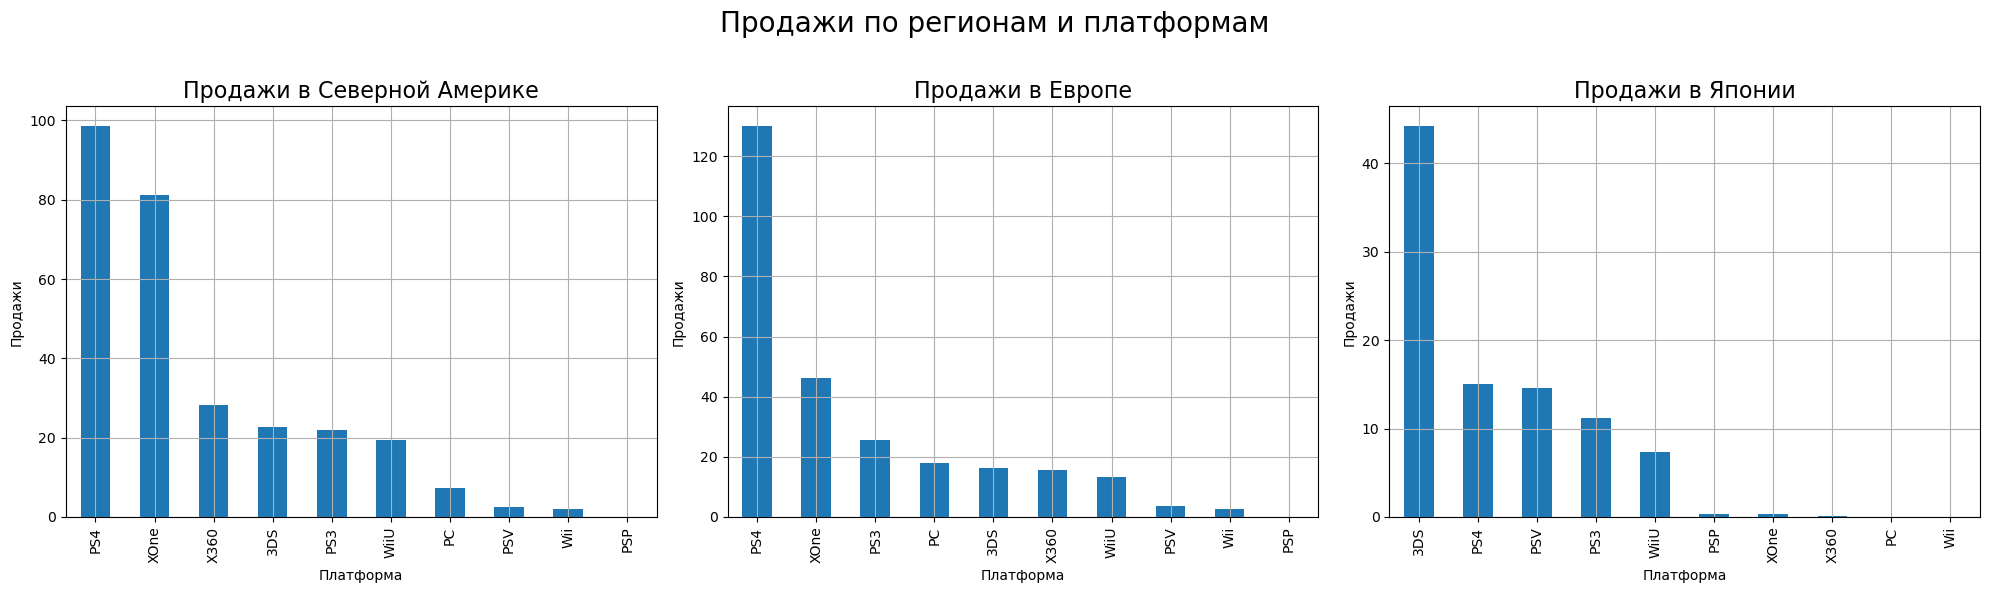

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
fig.suptitle('Продажи по регионам и платформам', fontsize=20)

# График для NA (North America)
platform_na.sort_values(ascending=False).plot(kind='bar', grid=True, ax=axes[0])
axes[0].set_title('Продажи в Северной Америке', fontsize=16)
axes[0].set_ylabel('Продажи')
axes[0].set_xlabel('Платформа')

# График для EU (Europe)
platform_eu.sort_values(ascending=False).plot(kind='bar', grid=True, ax=axes[1])
axes[1].set_title('Продажи в Европе', fontsize=16)
axes[1].set_ylabel('Продажи')
axes[1].set_xlabel('Платформа')

# График для JP (Japan)
platform_jp.sort_values(ascending=False).plot(kind='bar', grid=True, ax=axes[2])
axes[2].set_title('Продажи в Японии', fontsize=16)
axes[2].set_ylabel('Продажи')
axes[2].set_xlabel('Платформа')

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

In [47]:
def percent(platform, df, region):
    print(f"Доля суммарных продаж игр для платформы {platform} в {region}: {(df.loc[platform] / df.sum()) * 100:.2f}%")

In [48]:
na = ['X360', 'PS3', '3DS', 'PS4', 'XOne']

for platform in na:
    percent(platform, platform_na, 'Северной Америке')


Доля суммарных продаж игр для платформы X360 в Северной Америке: 9.96%
Доля суммарных продаж игр для платформы PS3 в Северной Америке: 7.76%
Доля суммарных продаж игр для платформы 3DS в Северной Америке: 7.97%
Доля суммарных продаж игр для платформы PS4 в Северной Америке: 34.71%
Доля суммарных продаж игр для платформы XOne в Северной Америке: 28.61%


In [49]:
eu = ['X360', 'PS3', 'PS4', 'PC', '3DS']
for platform in eu:
    percent(platform, platform_eu, 'Европе')

Доля суммарных продаж игр для платформы X360 в Европе: 5.72%
Доля суммарных продаж игр для платформы PS3 в Европе: 9.44%
Доля суммарных продаж игр для платформы PS4 в Европе: 48.04%
Доля суммарных продаж игр для платформы PC в Европе: 6.64%
Доля суммарных продаж игр для платформы 3DS в Европе: 5.96%


In [50]:
jp = ['WiiU', 'PS3', 'PS4', '3DS', 'PSV']

for platform in jp:
    percent(platform, platform_jp, 'Японии')

Доля суммарных продаж игр для платформы WiiU в Японии: 7.85%
Доля суммарных продаж игр для платформы PS3 в Японии: 12.05%
Доля суммарных продаж игр для платформы PS4 в Японии: 16.13%
Доля суммарных продаж игр для платформы 3DS в Японии: 47.52%
Доля суммарных продаж игр для платформы PSV в Японии: 15.62%


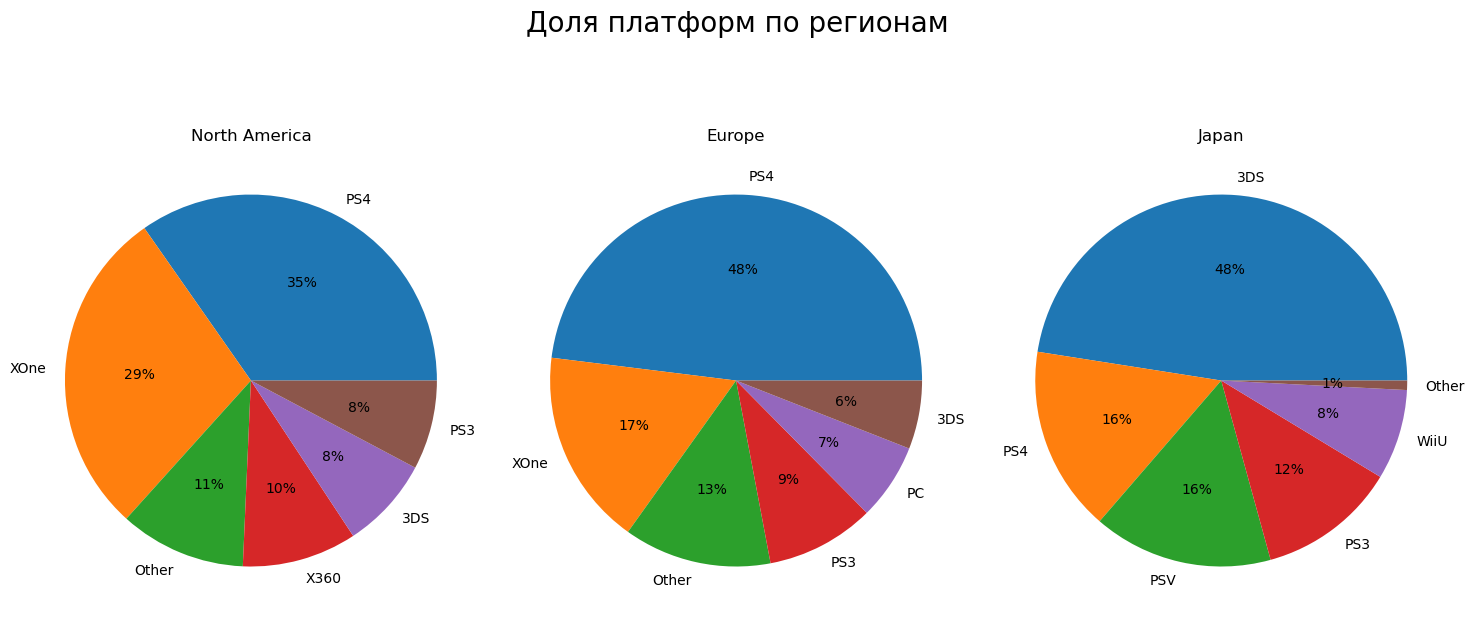

In [51]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Доля платформ по регионам', fontsize=20)

# Первый подграфик - Северная Америка
ax1 = plt.subplot(1, 3, 1)
data_to_plot_na = df_clean.pivot_table(index='platform', values='na_sales', aggfunc='sum') \
    .sort_values(by='na_sales', ascending=False).reset_index()
data_to_plot_na.loc[~data_to_plot_na['platform'].isin(data_to_plot_na['platform'].head()), 'platform'] = 'Other'
data_to_plot_na.groupby('platform') \
    .agg({'na_sales': 'sum'}) \
    .sort_values(by='na_sales', ascending=False) \
    .plot(kind='pie',
          y='na_sales',
          autopct='%.0f%%',
          ax=ax1,
          legend=False)
ax1.set_ylabel('')
ax1.set_title('North America')

# Второй подграфик - Европа
ax2 = plt.subplot(1, 3, 2)
data_to_plot_eu = df_clean.pivot_table(index='platform', values='eu_sales', aggfunc='sum') \
    .sort_values(by='eu_sales', ascending=False).reset_index()
data_to_plot_eu.loc[~data_to_plot_eu['platform'].isin(data_to_plot_eu['platform'].head()), 'platform'] = 'Other'
data_to_plot_eu.groupby('platform') \
    .agg({'eu_sales': 'sum'}) \
    .sort_values(by='eu_sales', ascending=False) \
    .plot(kind='pie',
          y='eu_sales',
          autopct='%.0f%%',
          ax=ax2,
          legend=False)
ax2.set_ylabel('')
ax2.set_title('Europe')

# Третий подграфик - Япония
ax3 = plt.subplot(1, 3, 3)
data_to_plot_jp = df_clean.pivot_table(index='platform', values='jp_sales', aggfunc='sum') \
    .sort_values(by='jp_sales', ascending=False).reset_index()
data_to_plot_jp.loc[~data_to_plot_jp['platform'].isin(data_to_plot_jp['platform'].head()), 'platform'] = 'Other'
data_to_plot_jp.groupby('platform') \
    .agg({'jp_sales': 'sum'}) \
    .sort_values(by='jp_sales', ascending=False) \
    .plot(kind='pie',
          y='jp_sales',
          autopct='%.0f%%',
          ax=ax3,
          legend=False)
ax3.set_ylabel('')
ax3.set_title('Japan')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Самые популярные жанры (топ-5). Поясните разницу.

Здесь на стал вычислять доли. Вот какие есть наблюдения:
1. Жанр action с большим отывом опережает остальных в Северной америке и Европе, в Японии занимает второе место.
2. Shooter и Sports на втором и третьем месте и имеют похожее соотношение сил как в Северной Америке, так и в Европе. В Японии же жанры не входит в топ 5.
3. Япония - страна role-playing игр(1 место по продажам). При этом жанр входит в топ 5 каждого региона
4. Игры Misc - находятся в топ 5 каждого региона, но существенно отстают от лидеров. 
5. Ещё про Японию. Рол-плей и экш сильно перетягивают на себя рынок. Далее большой разрыв. 3 место остаёт от второго в 3 раза. Примерно 25 млн против 75. 

In [52]:
genre_eu = df_clean.groupby(['genre'])['eu_sales'].agg('sum')
genre_na = df_clean.groupby(['genre'])['na_sales'].agg('sum')
genre_jp = df_clean.groupby(['genre'])['jp_sales'].agg('sum')

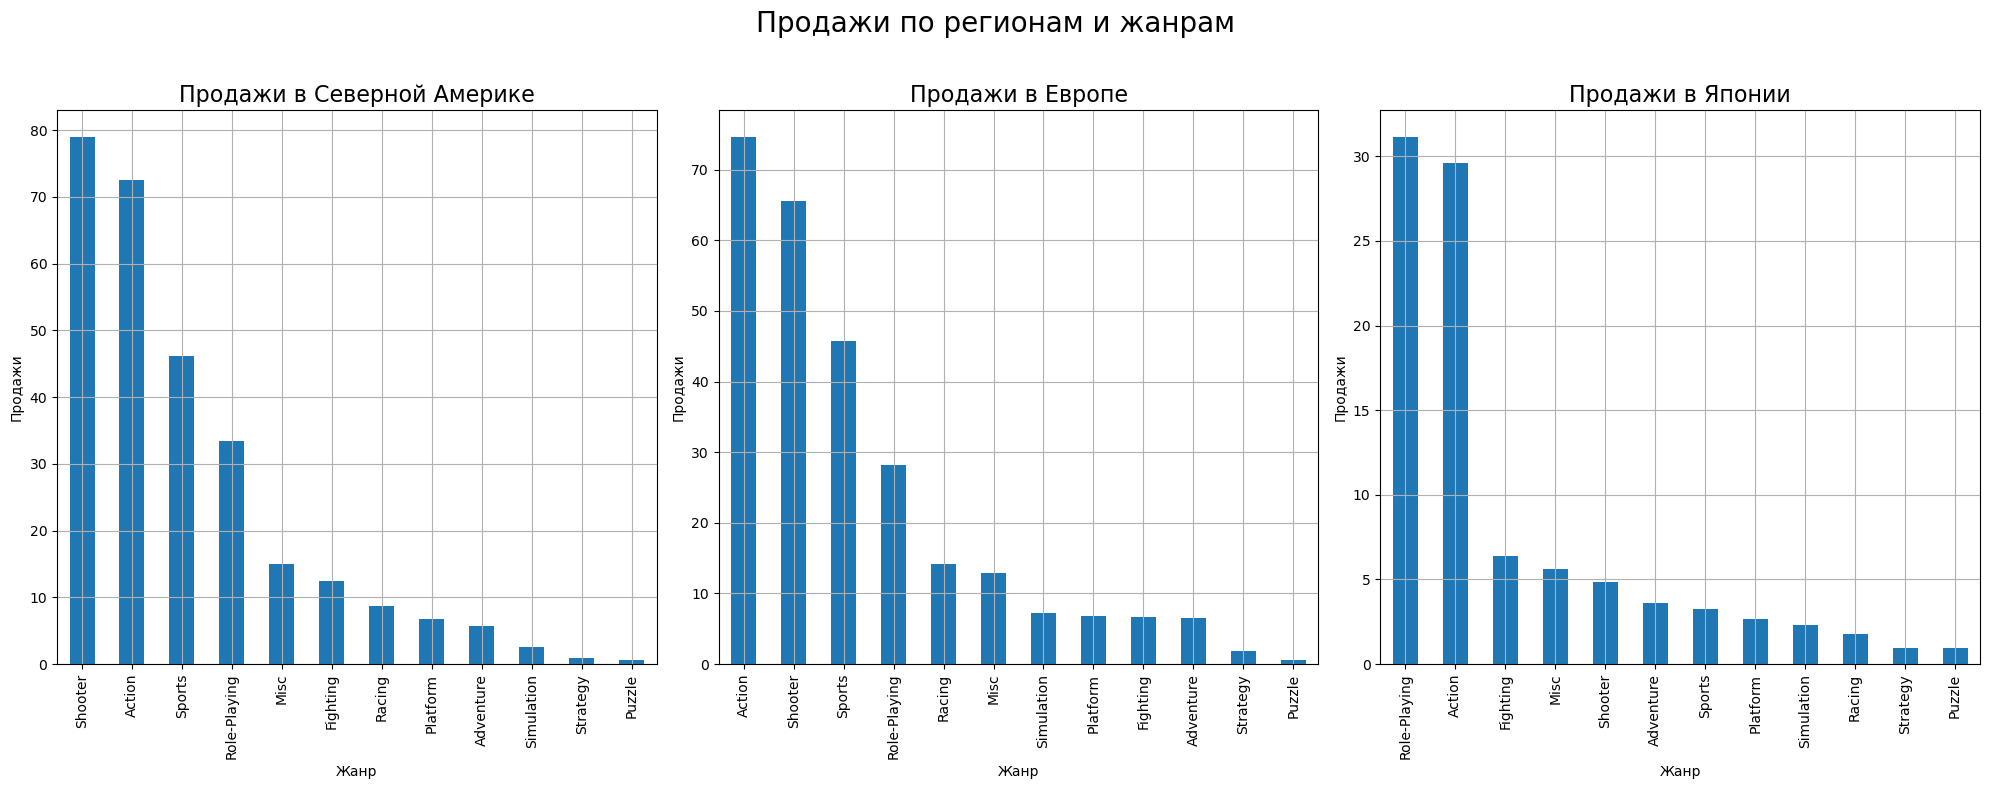

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
fig.suptitle('Продажи по регионам и жанрам', fontsize=20)

# График для NA (North America)
genre_na.sort_values(ascending=False).plot(kind='bar', grid=True, ax=axes[0])
axes[0].set_title('Продажи в Северной Америке', fontsize=16)
axes[0].set_ylabel('Продажи')
axes[0].set_xlabel('Жанр')

# График для EU (Europe)
genre_eu.sort_values(ascending=False).plot(kind='bar', grid=True, ax=axes[1])
axes[1].set_title('Продажи в Европе', fontsize=16)
axes[1].set_ylabel('Продажи')
axes[1].set_xlabel('Жанр')

# График для JP (Japan)
genre_jp.sort_values(ascending=False).plot(kind='bar', grid=True, ax=axes[2])
axes[2].set_title('Продажи в Японии', fontsize=16)
axes[2].set_ylabel('Продажи')
axes[2].set_xlabel('Жанр')

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

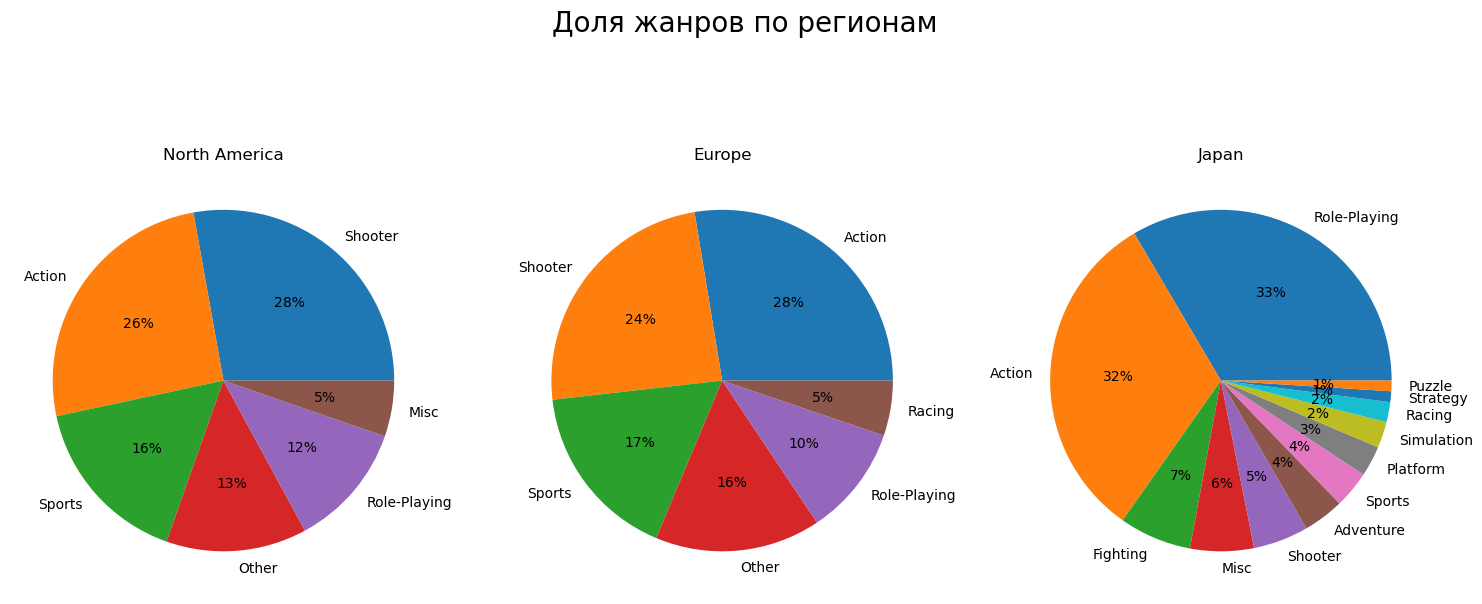

In [54]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Доля жанров по регионам', fontsize=20)

# Первый подграфик - Северная Америка
ax1 = plt.subplot(1, 3, 1)
data_to_plot_na = df_clean.pivot_table(index='genre', values='na_sales', aggfunc='sum') \
    .sort_values(by='na_sales', ascending=False).reset_index()
data_to_plot_na.loc[~data_to_plot_na['genre'].isin(data_to_plot_na['genre'].head()), 'genre'] = 'Other'
data_to_plot_na.groupby('genre') \
    .agg({'na_sales': 'sum'}) \
    .sort_values(by='na_sales', ascending=False) \
    .plot(kind='pie',
          y='na_sales',
          autopct='%.0f%%',
          ax=ax1,
          legend=False)
ax1.set_ylabel('')
ax1.set_title('North America')

# Второй подграфик - Европа
ax2 = plt.subplot(1, 3, 2)
data_to_plot_eu = df_clean.pivot_table(index='genre', values='eu_sales', aggfunc='sum') \
    .sort_values(by='eu_sales', ascending=False).reset_index()
data_to_plot_eu.loc[~data_to_plot_eu['genre'].isin(data_to_plot_eu['genre'].head()), 'genre'] = 'Other'
data_to_plot_eu.groupby('genre') \
    .agg({'eu_sales': 'sum'}) \
    .sort_values(by='eu_sales', ascending=False) \
    .plot(kind='pie',
          y='eu_sales',
          autopct='%.0f%%',
          ax=ax2,
          legend=False)
ax2.set_ylabel('')
ax2.set_title('Europe')

# Третий подграфик - Япония
ax3 = plt.subplot(1, 3, 3)
data_to_plot_jp = df_clean.pivot_table(index='genre', values='jp_sales', aggfunc='sum') \
    .sort_values(by='jp_sales', ascending=False).reset_index()
data_to_plot_jp.loc[~data_to_plot_jp['genre'].isin(data_to_plot_jp['genre'].head()), 'platform'] = 'Other'
data_to_plot_jp.groupby('genre') \
    .agg({'jp_sales': 'sum'}) \
    .sort_values(by='jp_sales', ascending=False) \
    .plot(kind='pie',
          y='jp_sales',
          autopct='%.0f%%',
          ax=ax3,
          legend=False)
ax3.set_ylabel('')
ax3.set_title('Japan')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Если сравнивать, то в Северной Америке и Европе больше продаются игры рейтинга "M" (17+) и распределение продаж очень похоже. Япония опять отличается. Топ продаж - это игры без ограничений и следом игры для лиц старше 13. Затруняюсь с этим вопросом. 

<div>
<p>Заполнил пропуски</p>
    <p>Построил новые графики уже с заполненными пропусками.</p>
    <p>Видно, что пропусков много и они влияют на общую картину</p>
    <p>По Японии я нашёл вот такую информацию</p>
    "Если же издатель желает выпустить игру в Японии, то там он будет иметь дело с системой оценок от Computer Entertainment Rating Organization (CERO), которая занимается данным вопросом с 2002 года. Компанию ей составляет и рейтинг исключительно для компьютерных игр – Ethics Organization of Computer Software (EOCS) – старейшая среди подобных организаций, между прочим (1992).

Для маркировки самих игр используются буквенные обозначения по аналогии с академической оценкой: A (0), B (12), C (15), D (17) и Z (18) вместо F, каждое из которых дополняется ещё и своим цветом. CERO – первый из упомянутых регуляторов, который делает упор на подростковом возрасте – после рейтинга «для всех» тут не используется обыденный в остальных системах «для детей». Кстати, они же чуть ли не единственные, кто требует размещения полноценной возрастной «метки» даже на «корешках» коробок." Источник (https://stopgame.ru/blogs/topic/107647/na_strazhe_detstva_esrb_pegi_i_drugie)
</div>

In [55]:
rating_eu = df_clean.groupby(['rating'])['eu_sales'].agg('sum')
rating_na = df_clean.groupby(['rating'])['na_sales'].agg('sum')
rating_jp = df_clean.groupby(['rating'])['jp_sales'].agg('sum')

In [56]:
df_clean['rating'] = df_clean['rating'].fillna('unknown')

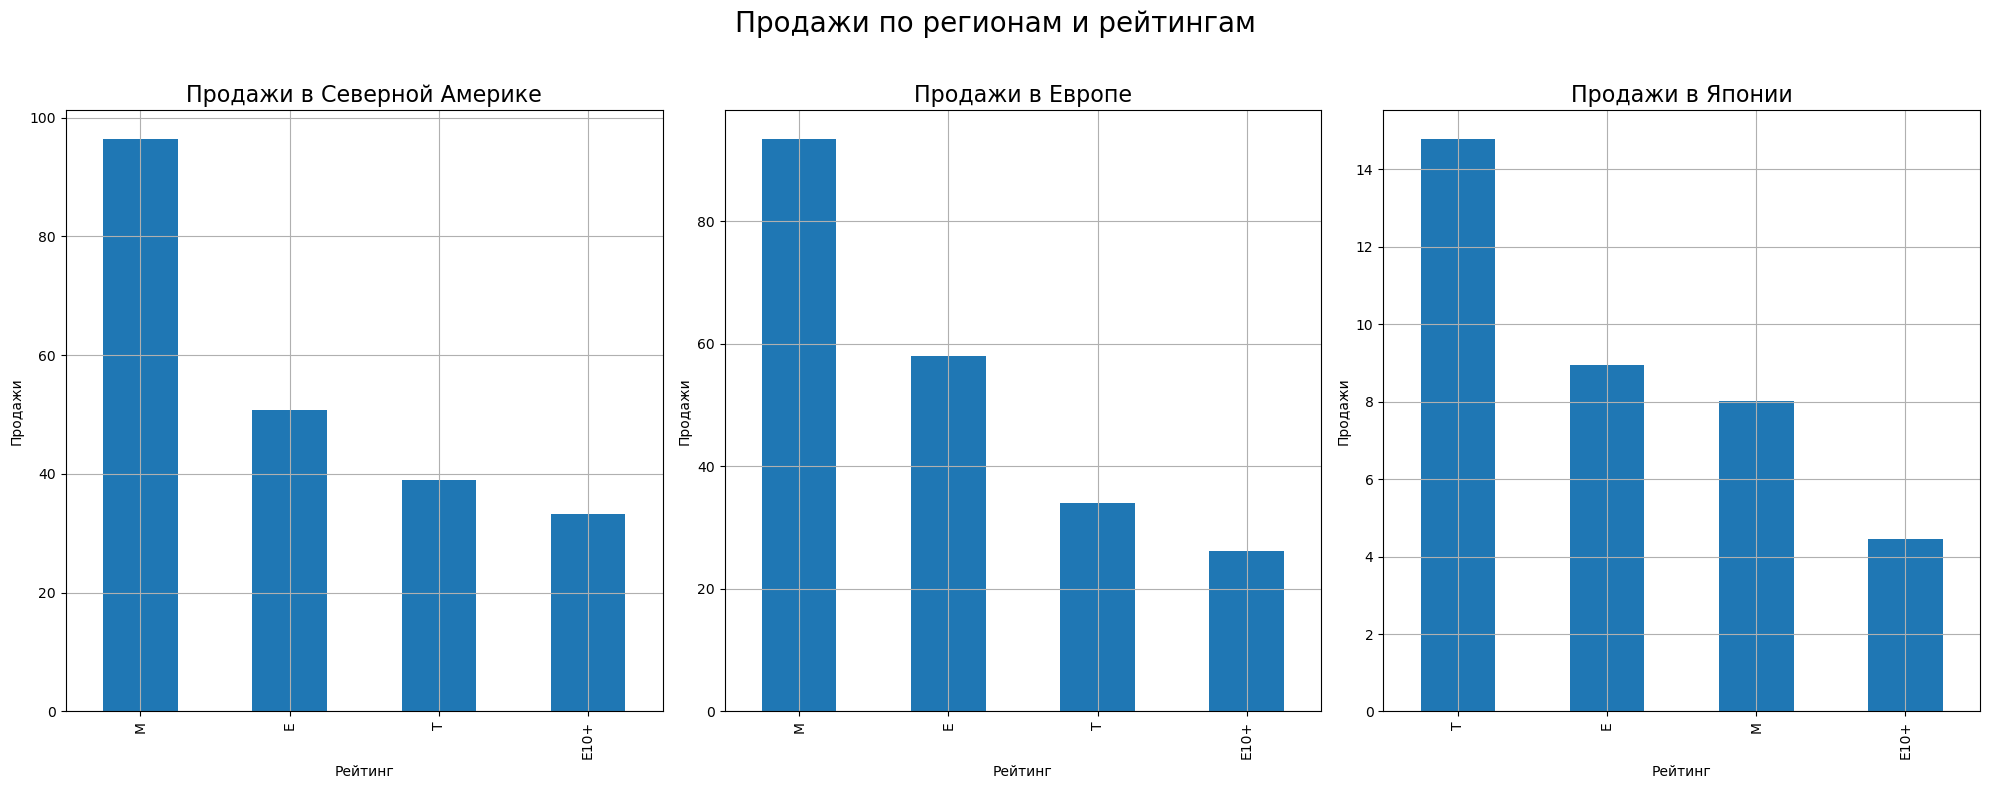

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
fig.suptitle('Продажи по регионам и рейтингам', fontsize=20)

# График для NA (North America)
rating_na.sort_values(ascending=False).plot(kind='bar', grid=True, ax=axes[0])
axes[0].set_title('Продажи в Северной Америке', fontsize=16)
axes[0].set_ylabel('Продажи')
axes[0].set_xlabel('Рейтинг')

# График для EU (Europe)
rating_eu.sort_values(ascending=False).plot(kind='bar', grid=True, ax=axes[1])
axes[1].set_title('Продажи в Европе', fontsize=16)
axes[1].set_ylabel('Продажи')
axes[1].set_xlabel('Рейтинг')

# График для JP (Japan)
rating_jp.sort_values(ascending=False).plot(kind='bar', grid=True, ax=axes[2])
axes[2].set_title('Продажи в Японии', fontsize=16)
axes[2].set_ylabel('Продажи')
axes[2].set_xlabel('Рейтинг')

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

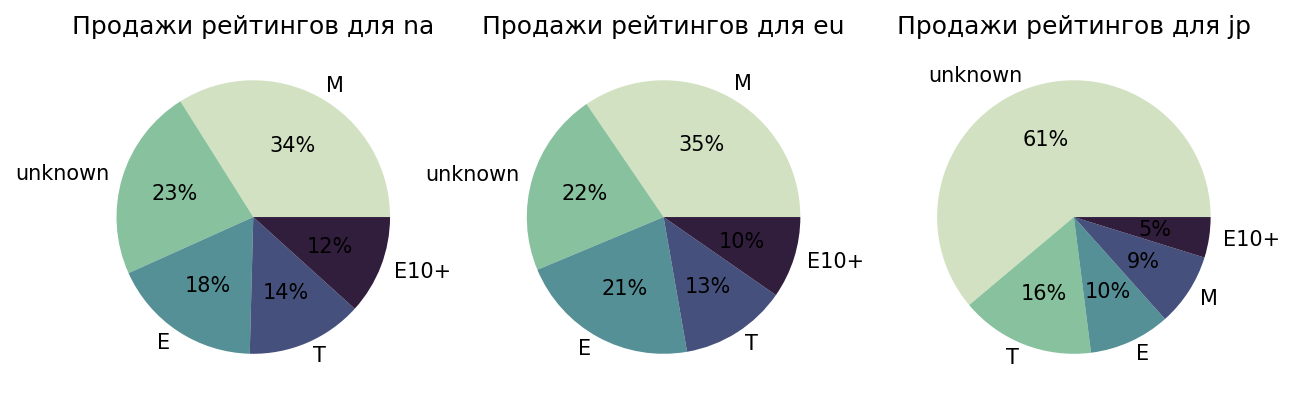

In [58]:

fig, axes = plt.subplots(1,3,figsize=(10,3), dpi=150)

for region, ax in zip(['na_sales','eu_sales','jp_sales'], axes.flat):
    data_to_plot = df_clean \
                        .groupby('rating') \
                        .agg({region : 'sum'}) \
                        .sort_values(by=region, ascending=False) \
                        .reset_index()
    data_to_plot.loc[~data_to_plot['rating'].isin(data_to_plot['rating'].head()), 'rating'] = 'другое'
    data_to_plot.groupby('rating').agg({region : 'sum'}).sort_values(by=region, ascending=False) \
        .plot(kind='pie', ax=ax, y=region, autopct='%.0f%%', legend=False,cmap=sns.cubehelix_palette(start=.6, rot=-.75, n_colors=7, as_cmap=True))
    ax.set_title('Продажи рейтингов для {}'.format(region.split('_')[0]))
    ax.set_ylabel('')

С таким количеством пропусков тяжело ранжировать рейтинги по долям в Японии, но это ещё раз показывает, что в Японии любят всё японское

## Проверка гипотезы

In [59]:
df_clean = df_clean.fillna(999)
df_clean.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,999.00,999.00,unknown,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,999.00,999.00,unknown,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,999.00,999.00,unknown,7.98


In [60]:
df_clean['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [61]:
df_clean.isnull().sum(axis=0).sort_values(ascending=False)

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

In [62]:
user_score_xbox = df_clean.loc[(df_clean['user_score'] != 999) & (df_clean['platform'] == 'X360')]['user_score']
user_score_one = df_clean.loc[(df_clean['user_score'] != 999) & (df_clean['platform'] == 'XOne')]['user_score']
user_score_pc = df_clean.loc[(df_clean['user_score'] != 999) & (df_clean['platform'] == 'PC')]['user_score']

<p>Все гипотезы я проверял через применетия t-теста (тест Стьютента) для равенства средних двух генеральных совокупностей.
В данном случае у нас независимые выборки.</p>
<p>H1 я определял как ту гипотезу, которую мы хотим проверить, а H0 задавал как обратную H1. Так как здесь речь о равестве либо не равестве, возможно только два варианта.</p>

<div>
<p>H0 - Средние пользовательские рейтинги платформ Xbox и One равны</p>
<p>H1 - Средние пользовательские рейтинги платформ Xbox и One не равны</p>
</div>

In [63]:

results = st.ttest_ind(user_score_xbox, 
                       user_score_one, 
                       equal_var = False
                      )
alpha = 0.05

print(results.pvalue)  


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.00020803162342416438
Отвергаем нулевую гипотезу


<p>H0 - Средние пользовательские рейтинги платформ Xbox и PC равны</p>
<p>H1 - Средние пользовательские рейтинги платформ Xbox и PC не равны</p>


In [64]:

results = st.ttest_ind(user_score_xbox, 
                       user_score_pc, 
                       equal_var = False
                      )
alpha = 0.05 

print(results.pvalue)  


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.0312821899616337
Отвергаем нулевую гипотезу


<p>H0 - Средние пользовательские рейтинги платформ PC и One равны</p>
<p>H1 - Средние пользовательские рейтинги платформ PC и One не равны</p>


In [65]:

results = st.ttest_ind(user_score_one, 
                       user_score_pc, 
                       equal_var = False
                      )
alpha = 0.05 

print(results.pvalue)  


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу



<p>H0 - Средние пользовательские рейтинги жанров Action  и Sports одинаковые</p>
<p>H1 - Средние пользовательские рейтинги жанров Action  и Sports не равны</p>

In [66]:
user_action = df_clean.loc[(df_clean['user_score'] != 999) & (df_clean['genre'] == 'Action')]['user_score']
user_sports = df_clean.loc[(df_clean['user_score'] != 999) & (df_clean['genre'] == 'Sports')]['user_score']


In [67]:
results = st.ttest_ind(user_action, 
                       user_sports, 
                       equal_var = False
                      )
alpha = 0.05 

print(results.pvalue)  


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.1825550382644557e-14
Отвергаем нулевую гипотезу


In [68]:
# Код ревьюера

'{:.0%}'.format(user_action.mean() / user_sports.mean() - 1)

'29%'

## Общий вывод

1. Игровая индустрия получила активное развитие ближе к двухтысячным годам, стремительно увеличая рост. с пиком в 2007-2009гг. 
2. После 2010 года начался спад по выпуску игр.
3. Игровые платформы в среднем живут 5-7 лет, потом их популярность падает.
4. На акутальный период (с 2014 года) самые пупулярные платформы это PS4, X360, Xone, и также популярные но меньше PS3, Wii и PC.
5. Существует небольшая положительная корреляция между оценками критиков и продажами игр, оценки пользователей не имеют линейной связи с популярностью игр.
6. Лидеры по продажам - игры в жанре экшн, шутеры, спорт. Экшны лидеры с солидным отрывом.
7. Я проверлял гипотезы о равестве срдених ретингов платформ Xbox One и PC. Гипотезы не подтввердились. 
8. Проверил гипотезу у том, что пользовательсткие рейтинги жанра Actions и Sports не равны и гипотеза подтвердилась.
9. Япония, тот регион, который выделяется и к их рынку нужно подходить внимательно, учитывая их возможные особенности. Например У японцев очень популярны игры в жанре Role-playing.
10 Европа и Северная Америка имеют много похожего. 
11. PS4 и XOne- одни из самых новых платформ. Можно предполагать, что выпускать игры для данных платформ будет менее рискованным действиям, хотя нужно смотреть и на другие аспекты. Опять же. В Японии может быть все подрогому. На это можно смотреть с разных сторон. С одной стороны западная аудитория больше и выгоднее владывать деньги разработывая игры популярных жанров для популярных платформ, однако всегда можно ради завоевания Японского рынка стараться создавать что-то под их запросы. Тут уж смотря чего мы хотим.